# WA-TOR
**Simulation proie-prédateur** ([article wikipédia](https://en.wikipedia.org/wiki/Wa-Tor) (en anglais))

Wa-Tor est une simulation de type proie-prédateur. Dans une mer torique évoluent des thons (les proies) et des requins (les prédateurs). Les uns et les autres se déplacent et se reproduisent. Pour acquérir l'énergie suffisante à sa survie un requin doit manger un thon régulièrement. Un thon vit éternellement tant qu'il n'est pas mangé par un requin.


## La mer

La mer est représentée par une grille à deux dimensions torique. Chaque case a quatre voisines, une dans chacune des quatre directions cardinales (N, S, E O). 
Chaque case de cette grille représente une zone de mer qui peut être soit vide, soit occupée par un thon ou un requin.<br>
Une grille torique est une grille classique dont on "ne peut pas sortir". Un dépassement de coordonnée vous ramène de l'autre côté. Par exemple, si une grille comporte 5 cases en largeurs, un déplacement de 1 case vers la droite à partir de 5<sup>ième</sup>, vous ramène à la première case etc...
<img src="./tore.png" width="150"/>

La mer est représentée par une grille à deux dimensions (liste de listes). Au départ, celle-ci est composée exclusivement de 0. Le zéro correspondant à une case vide.
>Créer une fonction *creer_grille(n,p)* où <em>n</em> désigne le nombre de lignes et *p* le nombre de colonnes.
Exemple avec une grille à 3 lignes et 2 colonnes:

In [6]:
# Taper le code ici 
def creer_grille(n,p):
    """
    Renvoie une tableau à n lignes et p colonnes
    :param: n,p (int)
    :return: L (list)
    >>> creer_grille(3,2)
    [[0, 0], [0, 0], [0, 0]]
    >>>
    """
    L=[]
    for _ in range(n):
        L.append([0]*p)
    return L

In [3]:
# essayer le code ici
creer_grille(3,2)

[[0, 0], [0, 0], [0, 0]]

>Créer une fonction *dimension(grille)* qui renvoit un tuple composé dans l'odre du nombre de lignes et du nombre de colonne de la grille entrée en paramètre.

In [7]:
# taper le code ici
def dimension(grille):
    """
    renvoie nombre de lignes et de colonnes
    :param: grille (list)
    :return: (tuple)
    >>> dimension(creer_grille(5,6))
    (5, 6)
    """
    return (len(grille),len(grille[0]))

In [5]:
# essayer le code ici
dimension(creer_grille(5,6))

(5, 6)

>Créer une fonction *creer_liste_point(grille) qui renvoie une liste composée de tous les tuples que l'on peut former avec les cases de la grille. 

In [8]:
# taper le code ici
def creer_liste_point(grille):
    """
    renvoie une liste de tuples à partir d'un tableau à deux dimensions
    :param: grille(list)
    :return: liste_point(list)
    >>> creer_liste_point(creer_grille(3,2))
    [(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (2, 1)]
    """
    (nb_lignes,nb_colonnes)=dimension(grille)
    liste_point=[]
    for i in range(nb_colonnes):
        for j in range(nb_lignes):
            liste_point.append((j,i))
    return liste_point

In [7]:
# essayer le code ici
creer_liste_point(creer_grille(3,2))

[(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (2, 1)]

>Créer une fonction *choisir_case_sur_grille(grille)* renvoyant un tuple correspondant à une case (x,y) tirée au hasard dans la grille.

In [9]:
# taper le code ici
from random import randint
def choisir_case_sur_grille(grille):
    """
    renvoie une case au hasard de la grille
    :param:grille(list)
    :return:(x,y) (tuple)
    >>> choisir_case_sur_grille(grille)
    (2, 0)
    >>> choisir_case_sur_grille(grille)
    (2, 2)
    """
    (nb_lignes,nb_colonnes)=dimension(grille)
    x=randint(0,nb_lignes-1)
    y=randint(0,nb_colonnes-1)
    return (x,y)


In [13]:
# essayer le code ici
grille=creer_grille(5,3)
choisir_case_sur_grille(grille)

(2, 2)

>Créer une fonction (prédicat) *verifier_case_vide(grille,x,y)* pour savoir si les coordonnées du point de destination passées en paramètres correspondent bien à celles d'une case libre sur la grille.
Dans le cas où la case est bien libre, on renvoie simplement True, on renvoie False sinon.

In [10]:
# taper le code ici    
def verifier_case_vide(grille,x,y):
    """
    prédicat pour teste sur une case de grille est vide de poissons
    c'est à dire contient 0
    :param: grille(list); x,y (int)
    :return: (bool)
    >>> verifier_case_vide(grille,2,1)
    True
    """
    if grille[x][y]==0:
        return True 
    else: 
        return False

>Créer une fonction *case_de_destination(grille,x,y,direction)* qui renvoie la case d'arrivée sur la *grille* en partant du point de coordonnées *x* et *y* en allant dans la *direction* qui est soit N, S, E , O. Il s'agira ici d'appliquer le principe de la grille torique.

In [11]:
# taper votre code ici
def case_de_destination(grille,x,y,direction): 
    """
    applique un changement de direction à un case en 
    utilisant le principe de la grille torique
    :param:grille(list); x,y (int); direction (str)
    :return:destination (tuple)
    >>> case_de_destination(grille,2,1,'E')
    (2, 2)
    >>> case_de_destination(grille,2,2,'E')
    (2, 0)
    >>> 
    """
    (nb_lignes,nb_colonnes)=dimension(grille)
    if direction=="O":
        destination=(x,(y-1)%nb_colonnes)            
    elif direction=="E":
        destination=(x,(y+1)%nb_colonnes)
    elif direction=="N":
        destination=((x-1)%nb_lignes,y)
    else:
        destination=((x+1)%nb_lignes,y)
    return destination
    

In [44]:
# essayer le code ici
grille=creer_grille(3,3)
case_de_destination(grille,2,2,'E')

(2, 0)

>Créer une fonction *trouver_case(grille,x,y,verifier)* qui renvoie la liste des cases (tuples) contigues au point de coordonnées (x,y) pour lesquelles la fonction *verifier* renvoie True. Attention, à veiller à ce que cette liste ne comporte pas de doublons. Pour commencer, on passera la fonction verifier_case_vide en paramètre.

In [12]:
# taper le code ici
def trouver_case(grille,x,y,verifier):
    '''
    renvoie la liste des cases contigues à la case x,y pour
    lesquelles la fonction verifier renvoie True
    :param:grille(list); x,y (int); verifier(function)
    :return:destination_possible(list)
    >>> trouver_case_vide(grille,1,1,verifie_case_vide)
    [(0, 1), (1, 0)]
    '''
    L=['N','S','E','O']
    destination_possible=[]   
    for direction in L:
        (x1,y1)=case_de_destination(grille,x,y,direction)
        case=verifier(grille,x1,y1)
        if case and not((x1,y1) in destination_possible):
            destination_possible.append((x1,y1))
    return destination_possible

In [50]:
# essayer le code ici
grille=creer_grille(3,3)
trouver_case(grille,1,1,verifier_case_vide)

[(0, 1), (2, 1), (1, 2), (1, 0)]

>Créer une fonction *tirer_case_au_hasard(destination_possible)* qui renvoie un tuple prélevé au hasard dans la liste *destination_possible*.

In [13]:
# taper le code ici
from random import randint
def tirer_case_au_hasard(destination_possible):
    """
    tire un tuple au hasard dans destination_possible
    :param:destination_possible(list)
    :return:destination_tiree(tuple)
    >>> tirer_case_au_hasard(destination_possible)
    (1, 0)
    """
    destination_tiree=destination_possible[randint(0,len(destination_possible)-1)]
    return destination_tiree

In [22]:
# essayer le code ici
grille=creer_grille(3,4)
destination_possible=trouver_case(grille,2,3,verifier_case_vide)
print(destination_possible)
tirer_case_au_hasard(destination_possible)

[(1, 3), (0, 3), (2, 0), (2, 2)]


(0, 3)


## Les poissons

Chaque thon est caractérisé par son *temps de gestation*. Ce temps est initialisé à une valeur initiale commune à tous les thons, appelée *durée de gestation des thons*.

Chaque requin est caractérisé par son *temps de gestation* et son *énergie*. Ces deux valeurs sont initialisées à une valeur initiale commune à tous les requins, appelées respectivement *durée de gestation des requins* et *énergie des requins*.

Le poisson est conçu comme un objet possédant divers attributs:
- l'abscisse *x* de la case dans laquelle il se trouve
- l'ordonnée *y* .
- son espèce: thon ou requin
- son temps de gestationn selon son espèce
- son niveau d'énergie si c'est un requin

>Créer un objet Poisson et définir les attributs. Le constructeur ne comportera que 3 paramètres: espece, x,y. On prendra 4 pour temps de gestation du requin, 2 pour les thons, 3 pour le niveau d'énergie des requins. Ces valeurs pour être déclarées en "tête de class" à l'aide de 3 variables gr,gt,e auxquelles ont accèdera avec la notation Poisson.e etc..

In [1]:
# taper le code ici
class Poisson:
    e,gr,gt = 3, 5, 2
    #constructeur
    def __init__(self,espece,x,y):      
        self.x=x
        self.y=y
        self.espece=espece
        if self.espece=="requin":
            self.gestation = Poisson.gr
            self.energie = Poisson.e
        else:
            self.gestation = Poisson.gt


In [2]:
# essayer le code ici
requin=Poisson("requin",2,3)
print(requin.x,requin.energie,requin.gestation)

2 3 5


Il s'agit maintenant de compléter le constructeur avec les méthodes:
- *duree_gestation*: diminue la durée de gestation de 1 si celle-ci est non nulle.
- *reset_gestation*: remet le temps de gestation à sa valeur initiale suivant l'espèce.
- *niveau_energie*: diminue le niveau d'energie de 1 unité si celui-ci n'est pas nul.
- *reset_energie*: remet le niveau d''énergie à sa valeur intiale
- *bouge*: change les coordonnées de l'objet suivant les coordonnées de destination passées en paramètre(s).

In [14]:
# compléter le code ici
class Poisson:
    e,gr,gt=3,5,2
    #constructeur
    def __init__(self,espece,x,y):
        
        self.espece=espece
        if self.espece=="requin":
            self.gestation = Poisson.gr
            self.energie = Poisson.e
        else:
            self.gestation = Poisson.gt

        self.x=x
        self.y=y
    #methodes
    def duree_gestation(self):
        if self.gestation>=1:
            self.gestation-=1
    def reset_gestation(self):
        if self.espece=='thon':
            self.gestation=Poisson.gt
        else:
            self.gestation=Poisson.gr        
    def niveau_energie(self):
        if self.energie>=1:
            self.energie-=1
    def reset_energie(self):
        self.energie=Poisson.e
            
    def bouge(self,x,y): 
        self.x=x
        self.y=y



In [4]:
# essayer le code ici
thon=Poisson("thon",2,3)
print(thon.gestation)
thon.duree_gestation()
print(thon.gestation)

2
1


Dans l'étape suivante, on uilisera la fonction *sample* issue du module random.<br>
La fonction *sample* extrait une sous-liste prélevée aléatoirement sans remise dans une liste.


>Créer une fonction *trouver_place_poisson(grille,a,b)* qui renvoie une liste de tuples correspondant aux *a+b* points choisis sur la grille vide où seront placés les poissons ultérieurement.

In [15]:
# taper le code ici
from random import sample
def trouver_place_poisson(grille,a,b):
    """
    renvoie une liste de a+b tuples choisis au hasard dans la grille
    :param:grille(list); a,b(int)
    :return:liste_point_occupe(list)
    >>>trouver_place_poisson(grille,1,3)
    [(1, 2), (2, 1), (0, 1), (1, 0)]
    """
    liste_point=creer_liste_point(grille)
    liste_point_occupe=sample(liste_point,a+b)
    return liste_point_occupe

In [18]:
# essayer le code ici
grille=creer_grille(3,3)
trouver_place_poisson(grille,1,3)

[(1, 2), (2, 1), (0, 1), (1, 0)]

Il s'agit maintenant de placer des poissons sur la grille. Pour cela, on considérera toujours qu'une case vide (sans poisson) correspondra à l'entier 0. <br>
>Créer une fonction *creer_population(grille,req,th)* plaçant *req* requins et *th* thons sur la *grille*.
<br> L'affichage d'une grille test de taille modeste permet simplement de vérifier l'affectation d'objets Poisson à certaines cases.


In [19]:
# taper le code ici
def creer_population(grille,req=5,th=5):
    """
    place des objets Poisson d'espèce requin ou thon sur la grille
    :param:grille(list); req,th(int)
    :return:grille(list)
    :effet de bord:grille
    """
    liste_point_occupe=trouver_place_poisson(grille,req,th)
    for i in range(req):  
        (x,y)=liste_point_occupe[i]
        r=Poisson('requin',x,y)
        grille[x][y]=r
    for i in range(req,req+th):
        point=liste_point_occupe[i]
        (x,y)=point
        t=Poisson('thon',x,y)
        grille[x][y]=t        
    return grille


In [32]:
# essayer le code ici
grille=creer_grille(4,3)
creer_population(grille,1,2)

[[0, 0, <__main__.Poisson at 0xb17430>],
 [<__main__.Poisson at 0xb17910>, 0, 0],
 [0, 0, 0],
 [0, <__main__.Poisson at 0xb6c330>, 0]]

On remarquera que lorsqu'une case contient un poisson, on peut alors accèder aux attributs comme le montre cet exemple:

In [34]:
print(grille[0][2].espece,grille[1][0].espece,grille[3][1].espece)

thon requin thon


>Créer une fonction *afficher_grille(grille)* qui affiche le contenu de la grille case par case et ligne par ligne en affichant un R ou un T respectivement pour les requins ou les thons.

In [26]:
# taper le code ici
def afficher_grille(grille):
    """
    prodédure qui affiche la grille ligne par ligne
    :param:grille(list)
    :effet de bord: print 
    >>> afficher_grille(grille)
    O O T T 
    O O O O 
    T T T R 
    """
    (nb_lignes,nb_colonnes)=dimension(grille)
    for i in range(nb_lignes):
        for j in range(nb_colonnes):
            if isinstance(grille[i][j],Poisson):
                if grille[i][j].espece=="thon":
                    print('T',end=' ')
                else:
                    print('R',end=' ')
            else:
                print('O',end=' ')
        print()

In [36]:
# essayer le code ici
grille=creer_grille(3,4)
population=creer_population(grille,1,5)
afficher_grille(grille)

O O R T 
T O O T 
O T O T 



## Simulation et comportements

 * **Un thon** applique le comportement suivant :
   1. *Déplacement* Le thon choisit aléatoirement une case libre parmi ses voisines. S'il en existe une, le thon se déplace vers cette case. Il reste sur place sinon. 
   2. *Reproduction* 
     - Le temps de gestation du thon est diminué de 1. 
     - Si ce temps arrive à 0, le thon donne naissance à un nouveau thon qui nait sur la case qu'il vient de quitter s'il s'est déplacé. Sinon aucun thon ne nait. Le temps de gestation est remis à sa valeur initiale.

>Créer une fonction (procédure) *vie_du_thon(poisson, grille)*. Cette fonction assure le déplacement et la gestation du thon sur grille passés en paramètres.<br>
Dans l'exemple ci-dessous, le thon situé en (2,0) s'est déplacé en (2,1).

À l'étape suivante, le thon se déplace encore, en repartant dans la case (2,0), il donne alors naissance à un thon dans la case (2,1) qu'il venait de quitter.

In [27]:
# taper le code ici
def vie_du_thon(fish,grille):
    """
    procedure qui gère la vie des thons
    :param:fish (objet Poisson); grille(list)
    :effet de bord : grille
    """
    fish.duree_gestation()
    x=fish.x
    y=fish.y
    destination_possible=trouver_case(grille,x,y,verifier_case_vide)
    if len(destination_possible)!=0:
        (x1,y1)=tirer_case_au_hasard(destination_possible)
        fish.bouge(x1,y1)
        grille[x][y]=0
        grille[fish.x][fish.y]=fish
        if fish.gestation==0:
        # naissance du thon et placement sur sa case     
            t=Poisson('thon',x,y)
            grille[x][y]=t

In [55]:
# essayer le code ici
grille=creer_grille(3,4)
population=creer_population(grille,1,5)
afficher_grille(grille)


O T O R 
T O O T 
T O O T 


In [56]:
vie_du_thon(grille[0][1],grille)
afficher_grille(grille)


O O O R 
T O O T 
T T O T 


In [57]:
vie_du_thon(grille[2][1],grille)
afficher_grille(grille)

O O O R 
T T O T 
T T O T 



 * **Un requin** applique le comportement suivant :
   1. *Energie* Le requin perd un point d'énergie.
   2. *Déplacement* Le requin choisit aléatoirement parmi ses voisines une case occupée par un thon. S'il en existe une, le requin se déplace vers cette case et mange le thon. Son niveau d'énergie est alors remis à sa valeur initiale. Sinon il cherche à se déplacer vers une case voisine vide choisie au hasard. Il reste sur place s'il n'y en a aucune.
   3. *Mort* Si le niveau d'énergie du requin est à 0, il meurt. Dans ce cas l'étape suivante n'a évidemment pas lieu.
   4. *Reproduction* Le temps de gestation du requin est diminué de 1. Si ce temps arrive à 0, il donne naissance à un nouveau requin sur la case qu'il vient de quitter s'il s'est déplacé, sinon aucun reuqin ne nait. Son temps de gestation est remis à sa valeur initiale.

>Créer une fonction *verifier_case_pleine_thon(grille,x,y)*. Cette fonction teste si la case de coordonnées *x,y* comporte un thon. Si c'est le cas, la fonction revoie True, False sinon.

In [28]:
# taper le code ici    
def verifier_case_pleine_thon(grille,x,y):
    """
    prédicat qui valide la présence d'un thon sur la case
    :param:grille(list); x,y(int)
    :return: (bool)
    >>> verifier_case_pleine_thon(grille,0,1)
    False
    >>> verifier_case_pleine_thon(grille,1,0)
    True
    """
    if isinstance(grille[x][y],Poisson): 
        if grille[x][y].espece=="thon":
            return True
        else:
            return False
    else:
        return False

In [59]:
# essayer le code ici
grille=creer_population(creer_grille(3,3),1,5)
afficher_grille(grille)

T R T 
O O T 
T T O 


In [61]:
verifier_case_pleine_thon(grille,1,1)

False

In [62]:
verifier_case_pleine_thon(grille,0,2)

True

>Créer une fonction *vie_du_requin(poisson, grille)*. Cette fonction assure la gestion de l'énergie, du déplacement et de reproduction du requin passé en paramètre.

Dans l'exemple ci-dessus, le requin situé en (1,2) s'est déplacé en (0,2) et a mangé le thon qui était placé sur la case. Dans l'exemple ci-dessous, le requin n'ayant pas pu manger de thon, se déplace et meurt.

In [29]:
def vie_du_requin(fish,grille):
    """
    procédure qui régit la vie des requins
    :param:fish(objet Poisson),grille (list)
    :effet de bord: grille
    """
    fish.niveau_energie()
    fish.duree_gestation()
    x=fish.x
    y=fish.y
    destination_possible=trouver_case(grille,x,y,verifier_case_pleine_thon)
    if len(destination_possible)!=0:
        (x1,y1)=tirer_case_au_hasard(destination_possible)
        (x,y)=(fish.x,fish.y)
        fish.bouge(x1,y1)
        (new_x,new_y)=(fish.x,fish.y)
        grille[x][y]=0
        fish.reset_energie()
        grille[new_x][new_y]=fish
        if fish.gestation==0:
            new_fish=Poisson("requin",x,y)
            grille[x][y]=new_fish
            fish.reset_gestation()
    else:
            
        destination_possible=trouver_case(grille,x,y,verifier_case_vide)
        if len(destination_possible)!=0:
            (x1,y1)=tirer_case_au_hasard(destination_possible)
            (x,y)=(fish.x,fish.y)
            fish.bouge(x1,y1)
            grille[x][y]=0
                
    if fish.niveau_energie()==0:
        del(fish)
        grille[x][y]=0

In [69]:
# essayer le code ici
grille=creer_population(creer_grille(3,3),1,5)
afficher_grille(grille)

O O R 
O T T 
T T T 


In [71]:
vie_du_requin(grille[0][2],grille)
afficher_grille(grille)

O O O 
O T T 
T T R 


Il s'agit maintenant de procéder à la simulation pas à pas. À chaque pas de la simulation, une case de la mer est sélectionnée aléatoirement. Si elle est vide, il ne se passe rien. Si elle est occupée par un poisson (requin ou thon), on applique alors le comportement correspondant à l'espèce. <br>
>Créer une fonction *comportement(grille)* applique le comportement adéquat au poisson situé sur une case choisie au hasard, si la case contient un poisson.

Dans l'exemple ci-dessus, on constate que rien ne s'est pas passé à l'étape 1, mais à l'étape 2, le requin a mangé un thon en prenant sa place.

In [30]:
# taper le code ici
def comportement(grille):
    """
    choisit une case au hasars sur la grille et applique le comportement
    correspondant à l'espèce de poisson placé sur la grille quand celle-ci n'est pas vide.
    :param:grille(list)
    :effet de bord: grille
    """
    (x,y)=choisir_case_sur_grille(grille)
    if isinstance(grille[x][y],Poisson): 
        fish=grille[x][y]
        if fish.espece=="thon":
            vie_du_thon(fish,grille)
        else:
            vie_du_requin(fish,grille)


In [31]:
# essayer le code ici
grille=creer_population(creer_grille(3,3),1,5)
for _ in range(3):
    comportement(grille)
    afficher_grille(grille)
    print()

O T O 
T R T 
T T O 

O T T 
T R O 
T T O 

O T T 
T R O 
T O T 




## Phénomènes proies-prédateurs émergents

Les durées de gestation des deux espèces et l'énergie récupérée par un requin lorsqu'il mange un thon sont des paramètres de la simulation. S'ils sont bien choisis on peut voir émerger un phénomène "périodique" d'évolution des populations.

Quand il y a peu de prédateurs, la population des proies augmente, mais cette abondance de proies permet alors aux prédateurs de facilement trouver l'énergie suffisante pour leur survie et leur reproduction. Leur population se met alors à croitre au détriment de celle de leur proie. Quand ces dernières deviennent trop rares, les prédateurs finissent par mourir sans se reproduire. Et quand il y a peu de prédateurs...


Pour obtenir ce phénomène cyclique,  il faut respecter les inégalités suivantes :

*temps gestation des thons < énergie des requins < durée gestation des requins*

Les valeurs suggérées sont 2, 3 et 5.

Il est également souhaitable de débuter avec une configuration dans
laquelle il y a un nombre de thons relativement important par rapport
au nombre de requins. Par exemple 30% des cases de la mer sont
initialement occupées par des thons et 10% par des requins.

>Créer une fonction *compter_poisson(grille)* renvoyant le nombre requins et de thons présents sur la grille sous forme d'un tuple.

In [32]:
# taper le code ici
def compter_poisson(grille):
    """
    renvoie le nombre de thons et de requis présents sur la grille
    :param:grille (list)
    :return: nb_requin, nb_thon (int)
    >>> compter_poisson(grille)
    (1, 3)
    """
    (nb_lignes,nb_colonnes)=dimension(grille)
    nb_requin,nb_thon=0,0
    for i in range(nb_colonnes):
        for j in range(nb_lignes):
            if isinstance(grille[j][i],Poisson):
                if grille[j][i].espece=="thon":
                    nb_thon+=1
                else:
                    nb_requin+=1
    return (nb_requin,nb_thon)

In [76]:
# essayer le code ici
grille=creer_population(creer_grille(3,3),1,5)
compter_poisson(grille)


(1, 5)

In [77]:
for _ in range(10):
    comportement(grille)
    print(compter_poisson(grille),end=' ; ')

(1, 5) ; (1, 4) ; (1, 4) ; (1, 4) ; (1, 4) ; (1, 3) ; (1, 4) ; (1, 5) ; (1, 6) ; (1, 7) ; 

À l'aide du module *matplotlib*, nous allons maintenant construire les courbes des effectifs de chaque espèce de poissons en fonctions du numéro du cycle.<br> L'exemple ci-dessous illustre la construction d'un graphique partant de 2 listes de mêmes effectifs, une pour les abscisses, l'autre pour les ordonnées.

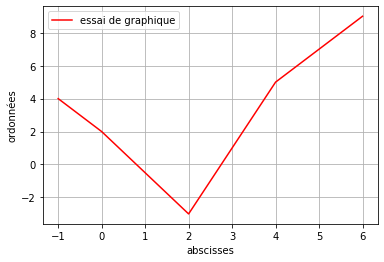

In [23]:
import matplotlib.pyplot as plt
listeAbscisses=[-1,0,2,4,6]
listeOrdonnees=[4,2,-3,5,9]
# définition de la courbe avec légende et couleur de tracé
plt.plot(listeAbscisses,listeOrdonnees,label="essai de graphique",color="red")
# définition des légendes sur les axes
plt.xlabel('abscisses')
plt.ylabel('ordonnées')
# on ordonne le tracé des légendes
plt.legend()
# on dessine la grille
plt.grid()
# on ordonne la construction
plt.show()

Pour commencer, créer une fonction *evolution(cycle,ligne,colonne,requin, thon)* dans laquelle les paramètres désignent respectivement:
- le nombre de cyles souhaités
- le nombre de lignes de la grille
- le nombre de colonnes de la grille
- le nombre de requins présents initialement sur la grille
- le nombre de thons présents initialemet sur la grille
Cette fonction devra créer la grille, sa population, les cycles et renvoyer les listes d'effectifs de poissons constituées au fur à mesure que les cycles se produisent.

In [35]:
# taper le code ici
def evolution(cycle,ligne, colonne,requin,thon):
    """
    renvoie des listes contenant le nombre de poissons en fonction du nombre de cycles
    :param:cycle,ligne, colonne,requin,thon (int)
    :return:nbReq,nbTh (int)
    >>>evolution(10,3,3,2,3)
    ([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3])
    """
    grille=creer_grille(ligne,colonne)
    creer_population(grille,requin,thon)
    listeX=[]
    nbReq=[requin]
    nbTh=[thon]
    for i in range(cycle):
        comportement(grille)
        r=compter_poisson(grille)
        nbReq.append(r[0])
        nbTh.append(r[1])        
    return (nbReq,nbTh)

In [36]:
# essayer le code ici
evolution(10,3,3,2,3)


([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3])

>Enfin, créer une fonction *tracer_evolution(cycle,ligne, colonne,requin,thon)* qui trace les courbes des effectifs des deux populations. On pensera à créer un liste d'abscisses allant de 0 à *cycle*. On pourra aussi, prévoir des valeur de paramètres par défaut.

In [39]:
# taper le code ici
def tracer_evolution(cycle=125000,ligne=25, colonne=25,requin=80,thon=160):
    """
    trace les courbes d'
    évolution des populations de
    thons et de requins aux cours des cycles
    :param:cycle,ligne, colonne,requin,thon (int)
    """
    resultat=evolution(cycle,ligne, colonne,requin,thon)
    nbReq=resultat[0]
    nbTh=resultat[1]
    listeX=list(range(0,cycle+1))
    plt.title("Vie des thons et des requins")
    plt.plot(listeX,nbReq,label='requins',color='red')
    plt.plot(listeX,nbTh,label='thons',color='blue')
    plt.xlabel('cycles')
    plt.ylabel('effectifs')
    plt.legend()
    plt.grid()
    plt.show()
        


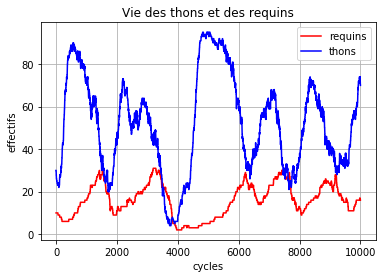

In [43]:
tracer_evolution(10000,10,10,10,30)